<a href="https://colab.research.google.com/github/eugeniaring/machine-learning-course-eugenia/blob/main/lezione6_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

link github: https://github.com/eugeniaring/machine-learning-course-eugenia/blob/main/data/Mall_Customers.csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[['Spending Score (1-100)','Annual Income (k$)']]

In [ ]:
X.describe()

,Spending Score (1-100),Annual Income (k$)
count,200.000000,200.000000
mean,50.200000,60.560000
std,25.823522,26.264721
min,1.000000,15.000000
25%,34.750000,41.500000
50%,50.000000,61.500000
75%,73.000000,78.000000
max,99.000000,137.000000


In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
type(X_std)

numpy.ndarray

In [ ]:
X_std.min(axis=0)

array([-1.91002079, -1.73899919])

In [ ]:
X_std.max(axis=0)

array([1.89449216, 2.91767117])

In [ ]:
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt

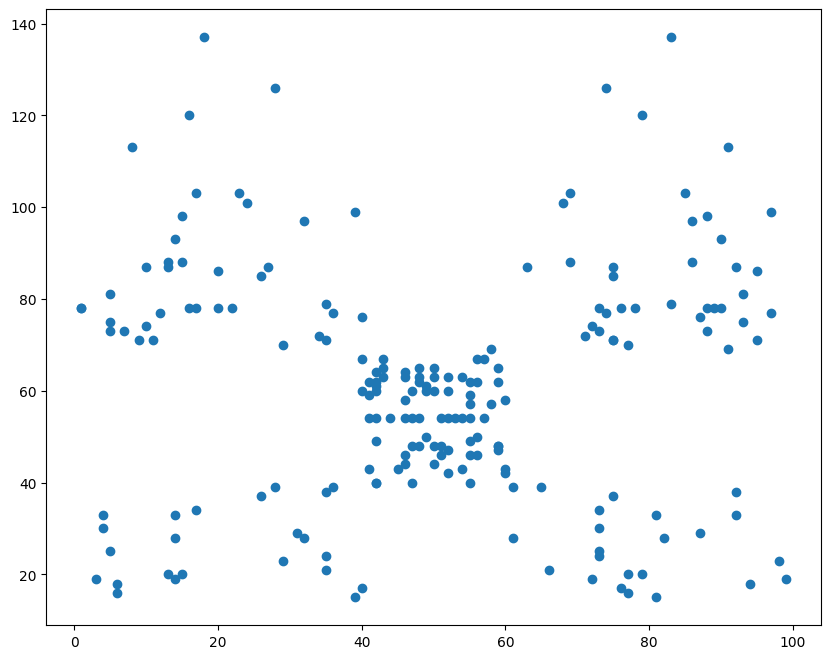

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X['Spending Score (1-100)'],X['Annual Income (k$)'])
plt.show()

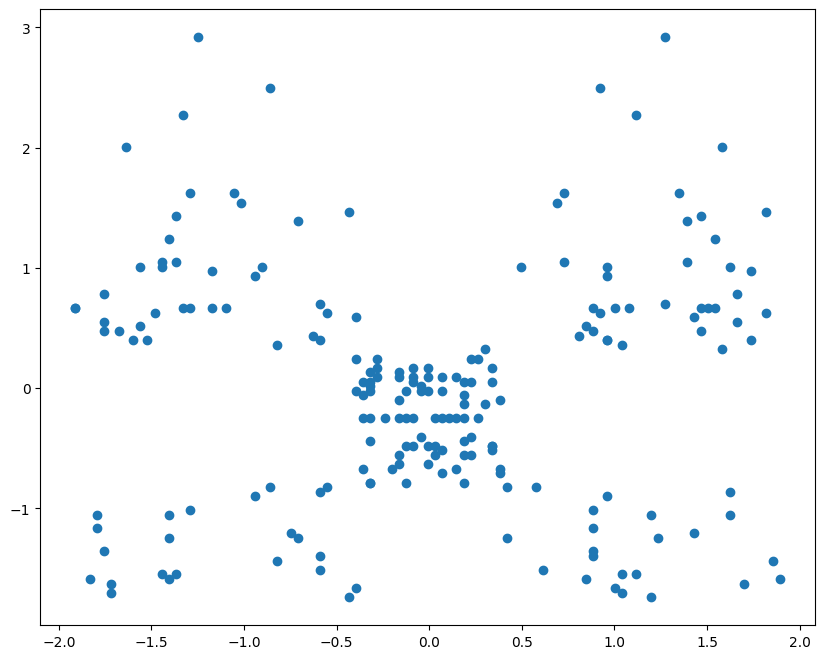

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_std[:,0],X_std[:,1])
plt.show()

## k-means

In [ ]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=123)
kmeans.fit(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

In [ ]:
kmeans.inertia_

65.56840815571681

In [ ]:
l_wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=123,n_init=20)
    kmeans.fit(X_std)
    l_wcss.append(kmeans.inertia_)

In [ ]:
X.columns

Index(['Spending Score (1-100)', 'Annual Income (k$)'], dtype='object')

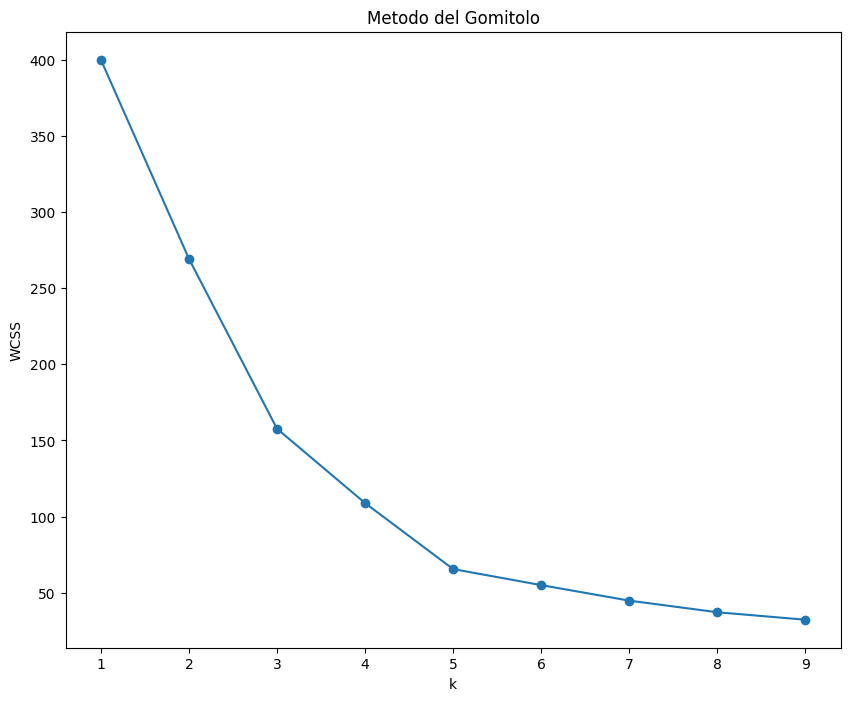

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Metodo del Gomitolo')
plt.plot(range(1,10),l_wcss,marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.xticks(range(1,10))
plt.show()

In [ ]:
l_wcss

[400.00000000000006,
 269.29934286898697,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.86628627232254,
 37.228187677585886,
 32.33081392367578]

In [ ]:
kmeans_k5 = KMeans(n_clusters=5,random_state=123)
kmeans_k5.fit(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

In [ ]:
X.columns

Index(['Spending Score (1-100)', 'Annual Income (k$)'], dtype='object')

In [ ]:
cluster_labels = kmeans_k5.labels_

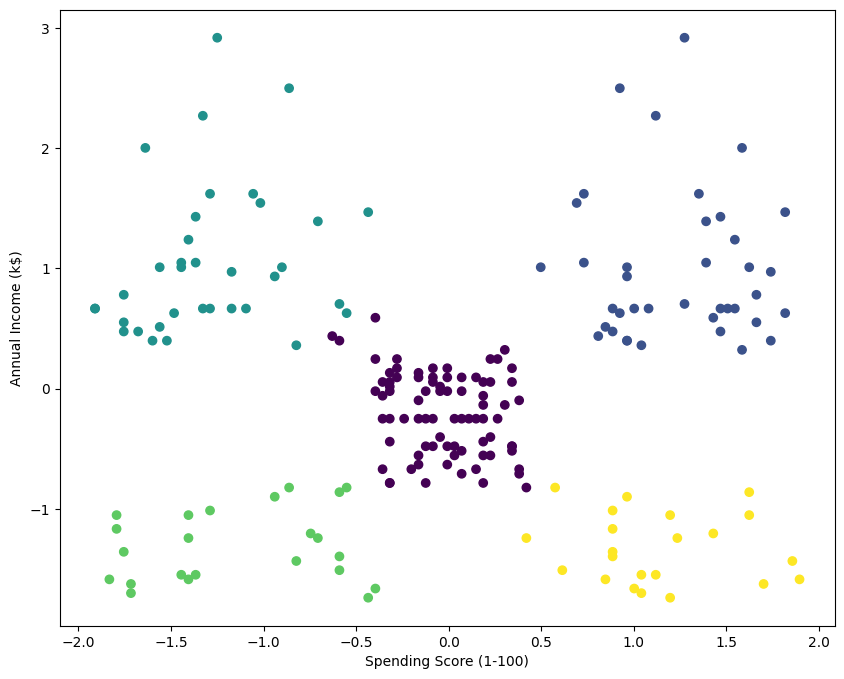

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_std[:,0],X_std[:,1],marker='o',c=cluster_labels)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [ ]:
centroids = kmeans_k5.cluster_centers_

In [ ]:
len(X_std)

200

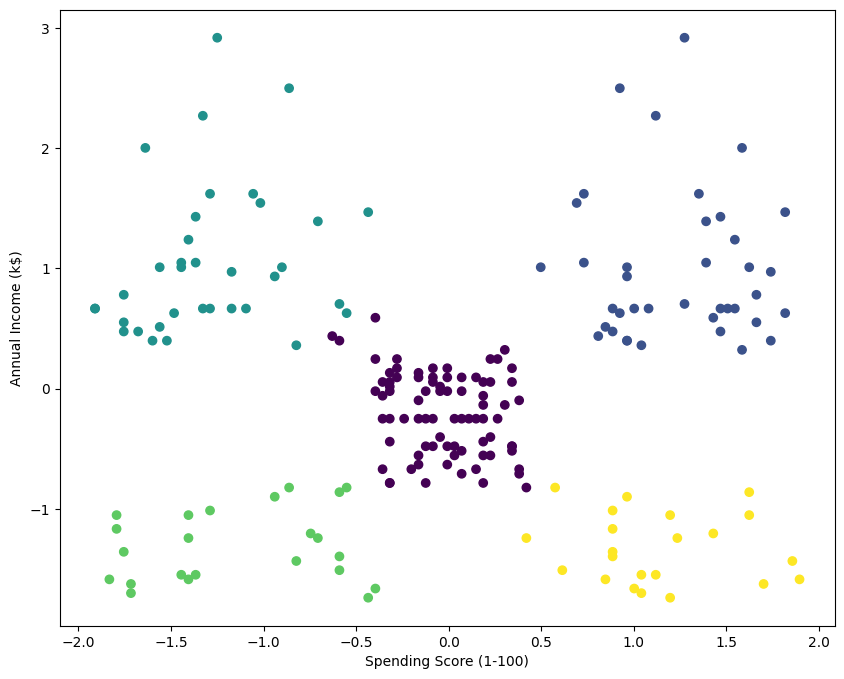

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_std[:,0],X_std[:,1],marker='o',c=cluster_labels)
#plt.scatter(centroids[:,0],centroids[:,1],s=200,marker='x',c=cluster_labels)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

## DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.4,min_samples=7)
labels_dbscan = dbscan.fit_predict(X_std)

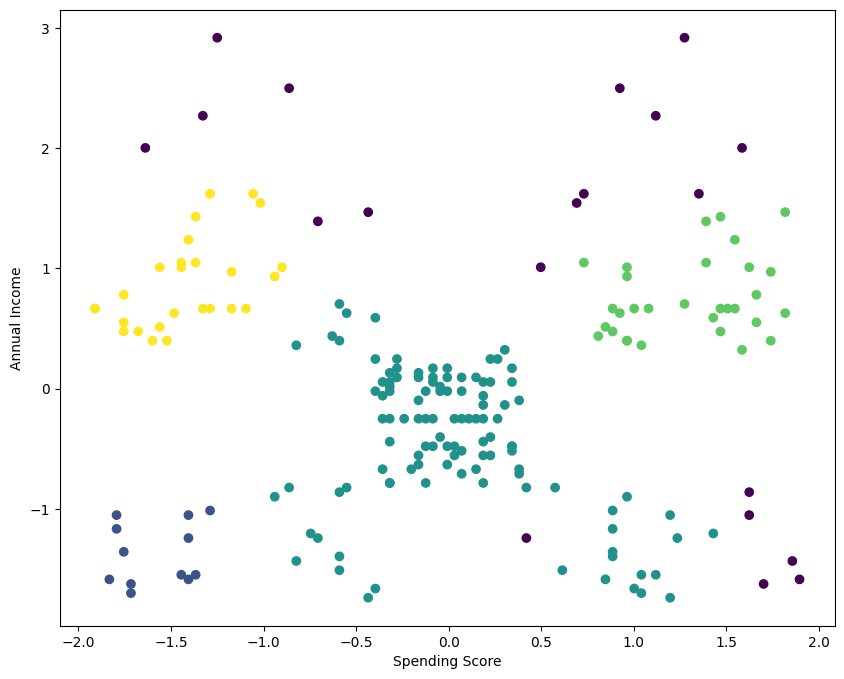

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_std[:,0],X_std[:,1],marker='o',c=labels_dbscan)
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.show()

## secondo use case

link dataset su kaggle: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

link dataset su github: https://github.com/eugeniaring/machine-learning-course-eugenia/blob/main/data/mobile_train.csv

In [ ]:
#df = pd.read_csv('https://github.com/eugeniaring/machine-learning-course-eugenia/blob/main/data/mobile_train.csv')
df = pd.read_csv('mobile_train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df[['price_range']].head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
X.describe()

,battery_power,ram
count,2000.000000,2000.000000
mean,1238.518500,2124.213000
std,439.418206,1084.732044
min,501.000000,256.000000
25%,851.750000,1207.500000
50%,1226.000000,2146.500000
75%,1615.250000,3064.500000
max,1998.000000,3998.000000


In [ ]:
X = df[['battery_power','ram']]

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
X_std.min(axis=0)

array([-1.67881744, -1.72271137])

In [ ]:
X_std.max(axis=0)

array([1.72881194, 1.72785125])

### kmeans

In [ ]:
l_wcss = []
for k in range(1,10):
   kmeans = KMeans(n_clusters=k,random_state=123)
   kmeans.fit(X_std)
   l_wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

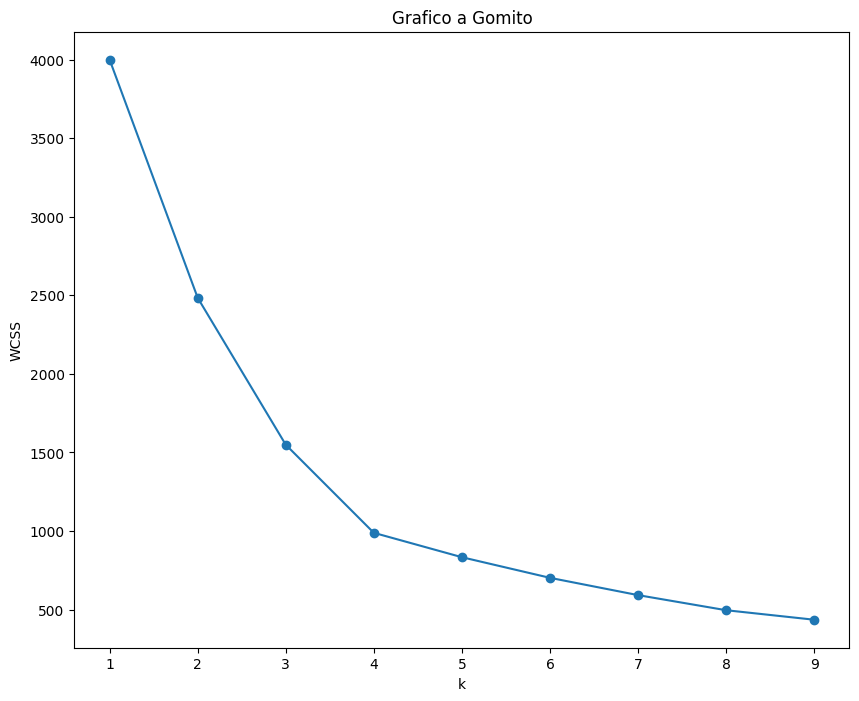

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10),l_wcss,marker='o')
plt.title('Grafico a Gomito')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.xticks(range(1,10))
plt.show()

In [ ]:
kmeans_k4 = KMeans(n_clusters=4,random_state=123)
kmeans_k4.fit(X_std)
labels = kmeans_k4.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X.columns

Index(['battery_power', 'ram'], dtype='object')

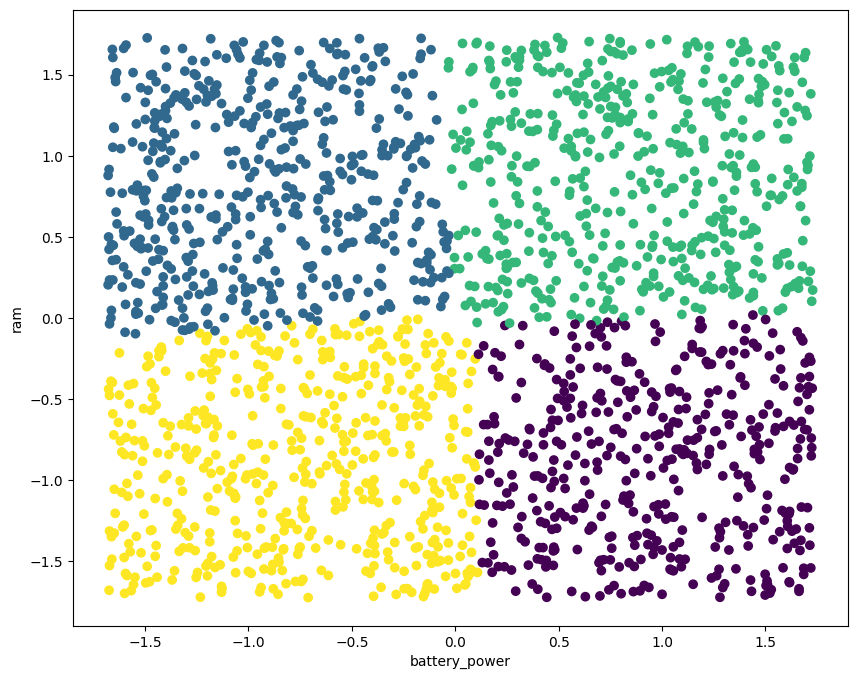

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_std[:,0],X_std[:,1],c=labels)
plt.xlabel('battery_power')
plt.ylabel('ram')
plt.show()

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
df[df.price_range==3][['battery_power','ram','int_memory','mobile_wt']].corr()

,battery_power,ram,int_memory,mobile_wt
battery_power,1.000000,-0.262759,-0.041099,-0.002937
ram,-0.262759,1.000000,-0.048515,0.107730
int_memory,-0.041099,-0.048515,1.000000,-0.057593
mobile_wt,-0.002937,0.107730,-0.057593,1.000000


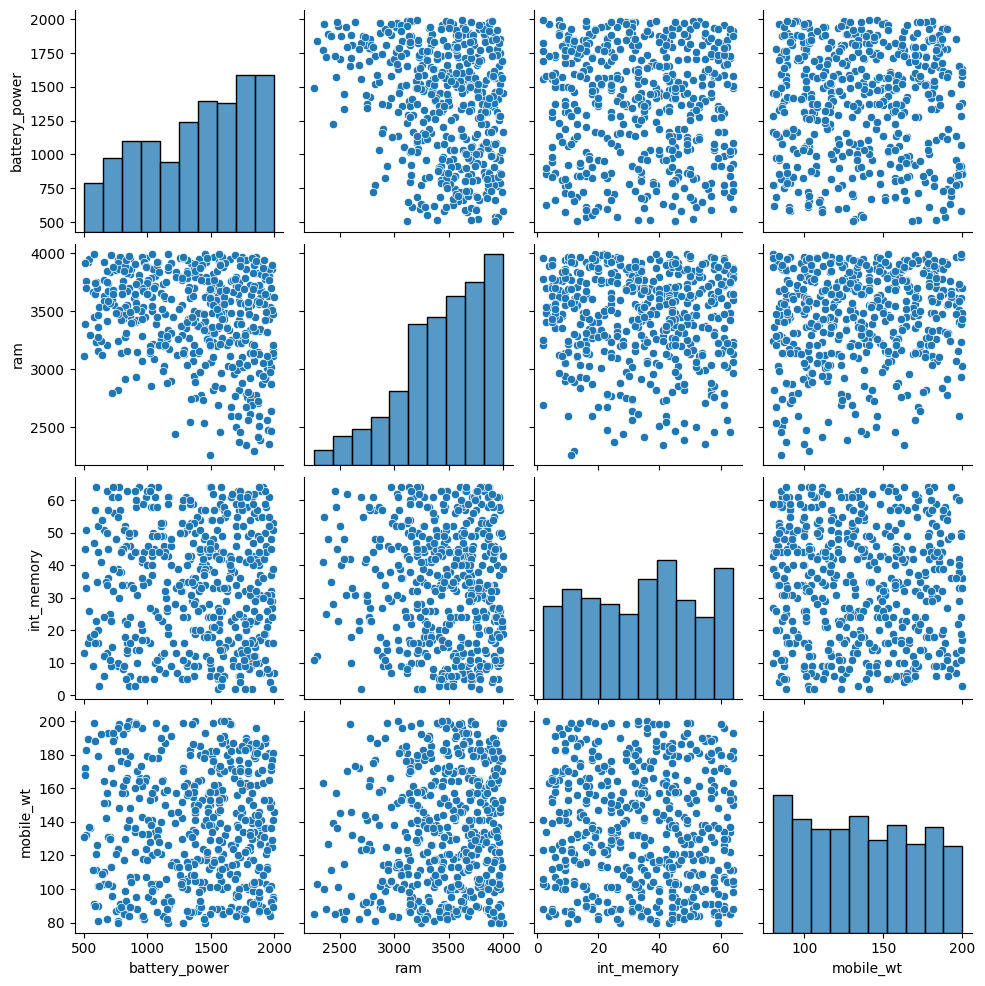

In [ ]:
import seaborn as sns

sns.pairplot(df[df.price_range==3][['battery_power','ram','int_memory','mobile_wt']], diag_kws={'bins': 10})

### dbscan

In [ ]:
dbscan = DBSCAN(eps=0.5,min_samples=4)
labels = dbscan.fit_predict(X_std)

In [ ]:
X.columns

Index(['battery_power', 'ram'], dtype='object')

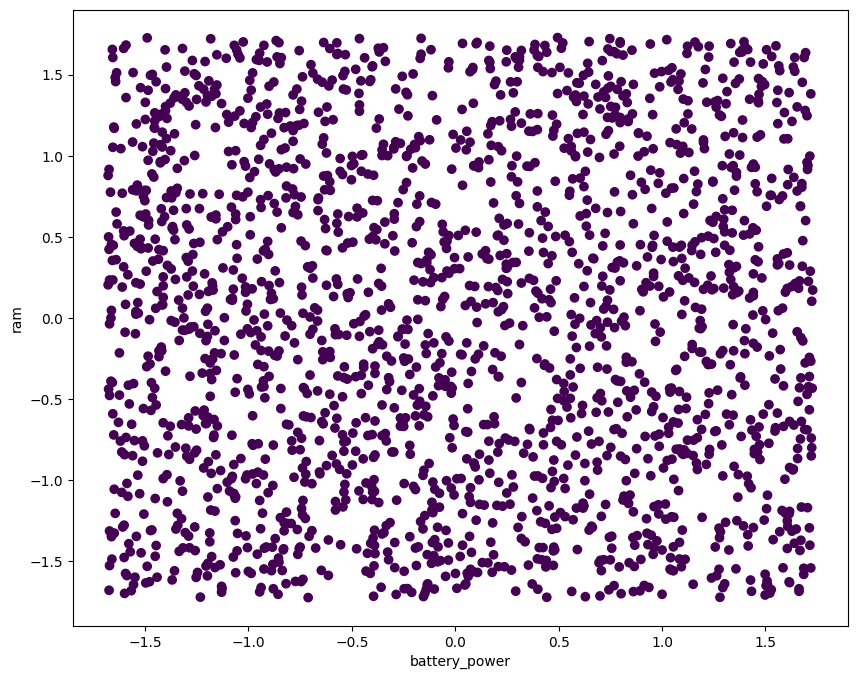

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_std[:,0],X_std[:,1],c=labels)
plt.xlabel('battery_power')
plt.ylabel('ram')
plt.show()